### Wine Features Description

 - **fixed acidity**: fixed acids found in wines gives a sour taste. Acidity affects taste and pH, which affects color, stability to oxidation, overall the lifespan of wine.
 - **volatile acidity**: The amount of volatile acidity found in sound grapes is negligible. High content of volatile acidity refers to    vinegars (spoiled wine) but it's also used to add complexity to the wine
 - **citric acid**: it is added to wines as a stabiliser and to complement flavor or increase 'fresh' flavor.
 - **residual sugar**: residual sugar content from grapes, defines the wine sweetness, from dry (0-9 g/l) to sweet (+120 g/l)
 - **chlorides**: amount of salt in wine 
 - **free sulfur dioxide**: prevents oxidation and microbial growth. It can give fruity taste but in high concentration can produce a sharp/bitter/chemical flavor 
 - **total sulfur dioxide**: together with free sulfur dioxide can give a sense of how “clean” a wine is. If a wine has a free sulfur dioxide percentage of the total sulfur unusually small, it’s often an indication that the wine is chemically and/or microbially unstable.
 - **density**: density of wine is determined by the concentration of alcohol, sugar, glycerol, and other dissolved solids
 - **pH**: pH is a way to measure ripeness in relation to acidity. Low pH wines taste tart and crisp. PH level tells how intense the acids taste
 - **sulphates**: it's a preservative. It maintain color and flavor. Some believe that adding sulphates affects negatively wine flavor

 

### Data Exploration

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
w = pd.read_csv('winequality-white.csv', delimiter=';')
r = pd.read_csv('winequality-red.csv')
w['type'] = 0
r['type'] = 1
data = pd.concat([r,w])

##### Wine Quality Categories:
 - 0: bad
 - 1: average
 - 2: good
 - 3: very godd 
 
#### Wine Types
 - 0: white
 - 1: red



In [3]:
data['cat'] = data['quality'].apply(lambda x: 0 if x<=4 else (1 if x <=6 else(2 if x >=7  else (3))))
data.to_csv('data.csv')

### Correlation Matrix

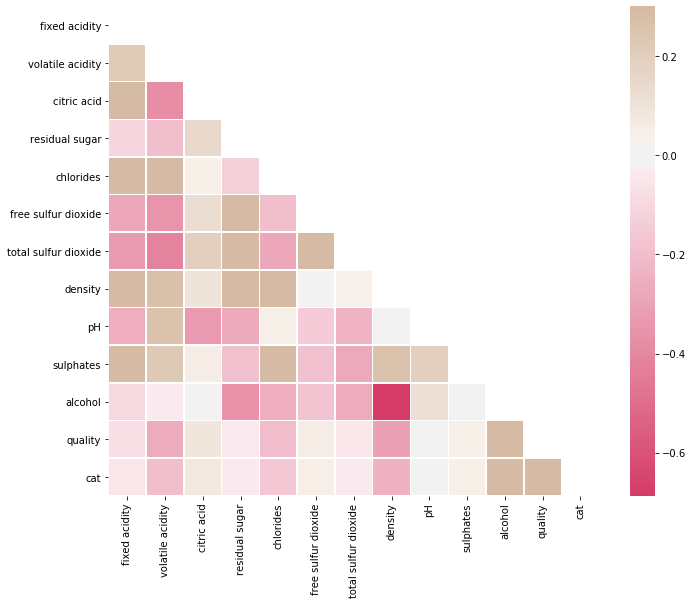

In [42]:
corr = data.corr()

# Generate a mask for the upper triangle
mask = np.zeros_like(corr, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True


f, ax = plt.subplots(figsize=(11, 9))
cmap = sns.diverging_palette(h_neg=1,h_pos=400, center="light", as_cmap=True)
sns.heatmap(corr, mask=mask, cmap=cmap, vmax=.3, center=0, linewidths=.5)

In [43]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scale = MinMaxScaler()
num = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
cat = data.drop(columns = num.columns)
num_scale = pd.DataFrame(scale.fit_transform(num), columns = num.columns, index = num.index)
df_mm = pd.concat([num_scale, cat], axis = 1)


scale = StandardScaler()
num_ss = data[['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']]
cat_ss = data.drop(columns = num_ss.columns)
num_scale_ss = pd.DataFrame(scale.fit_transform(num_ss), columns = num_ss.columns, index = num_ss.index)
df_ss = pd.concat([num_scale_ss, cat_ss], axis = 1)

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,cat
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,0.282257,0.173111,0.191948,0.074283,0.078129,0.102518,0.252868,0.146262,0.386435,0.174870,0.361131,5.818378,1.158689
std,0.107143,0.109758,0.087541,0.072972,0.058195,0.061630,0.130235,0.057811,0.124641,0.083599,0.172857,0.873255,0.457456
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,3.000000,0.000000
25%,0.214876,0.100000,0.150602,0.018405,0.048173,0.055556,0.163594,0.100829,0.302326,0.117978,0.217391,5.000000,1.000000
50%,0.264463,0.140000,0.186747,0.036810,0.063123,0.097222,0.258065,0.149990,0.379845,0.162921,0.333333,6.000000,1.000000
75%,0.322314,0.213333,0.234940,0.115031,0.093023,0.138889,0.345622,0.190476,0.465116,0.213483,0.478261,6.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,9.000000,2.000000


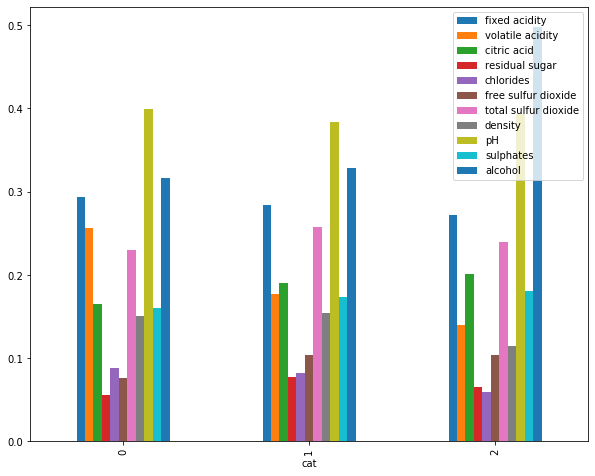

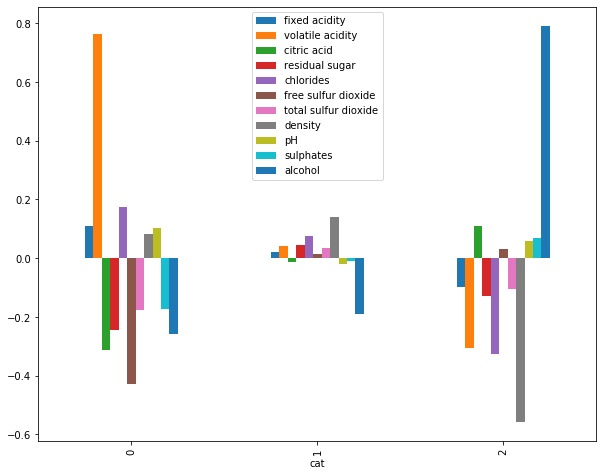

In [44]:
g = df_mm.groupby('cat').mean()
g_2 = df_ss.groupby('cat').mean()

g.drop(columns='quality').plot(kind='bar', figsize=(10,8))
g_2.drop(columns='quality').plot(kind='bar', figsize=(10,8))

df_ss.describe()
df_mm.describe()

In [45]:
g = sns.pairplot(data.drop(columns=['quality','cat']), c=data.cat)
for i, j in zip(*np.triu_indices_from(g.axes, 1)):
    g.axes[i, j].set_visible(False)

TypeError: pairplot() got an unexpected keyword argument 'c'

/Users/flatironschool/anaconda3/lib/python3.7/site-packages/seaborn/distributions.py:198: RuntimeWarning: Mean of empty slice.
  line, = ax.plot(a.mean(), 0)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/core/_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/Users/flatironschool/anaconda3/lib/python3.7/site-packages/numpy/lib/histograms.py:893: RuntimeWarning: invalid value encountered in true_divide
  return n/db/n.sum(), bin_edges


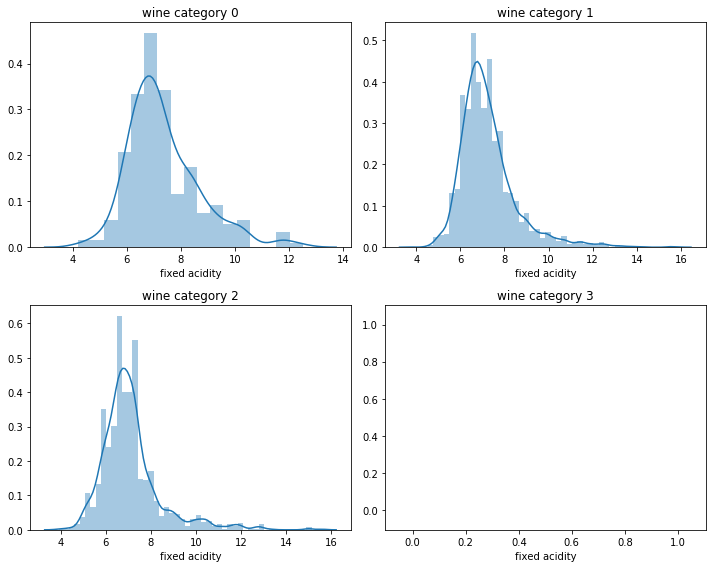

In [46]:
fig, axes = plt.subplots(ncols=2, nrows=2, figsize=(10, 8))
axes = axes.ravel()


for i, j in zip(range(0,4),range(0, 4)):
    sns.distplot(data['fixed acidity'].loc[(data['cat'] == i)], ax=axes[j]).set_title('wine category {}'.format(i))
fig.tight_layout()
plt.show()

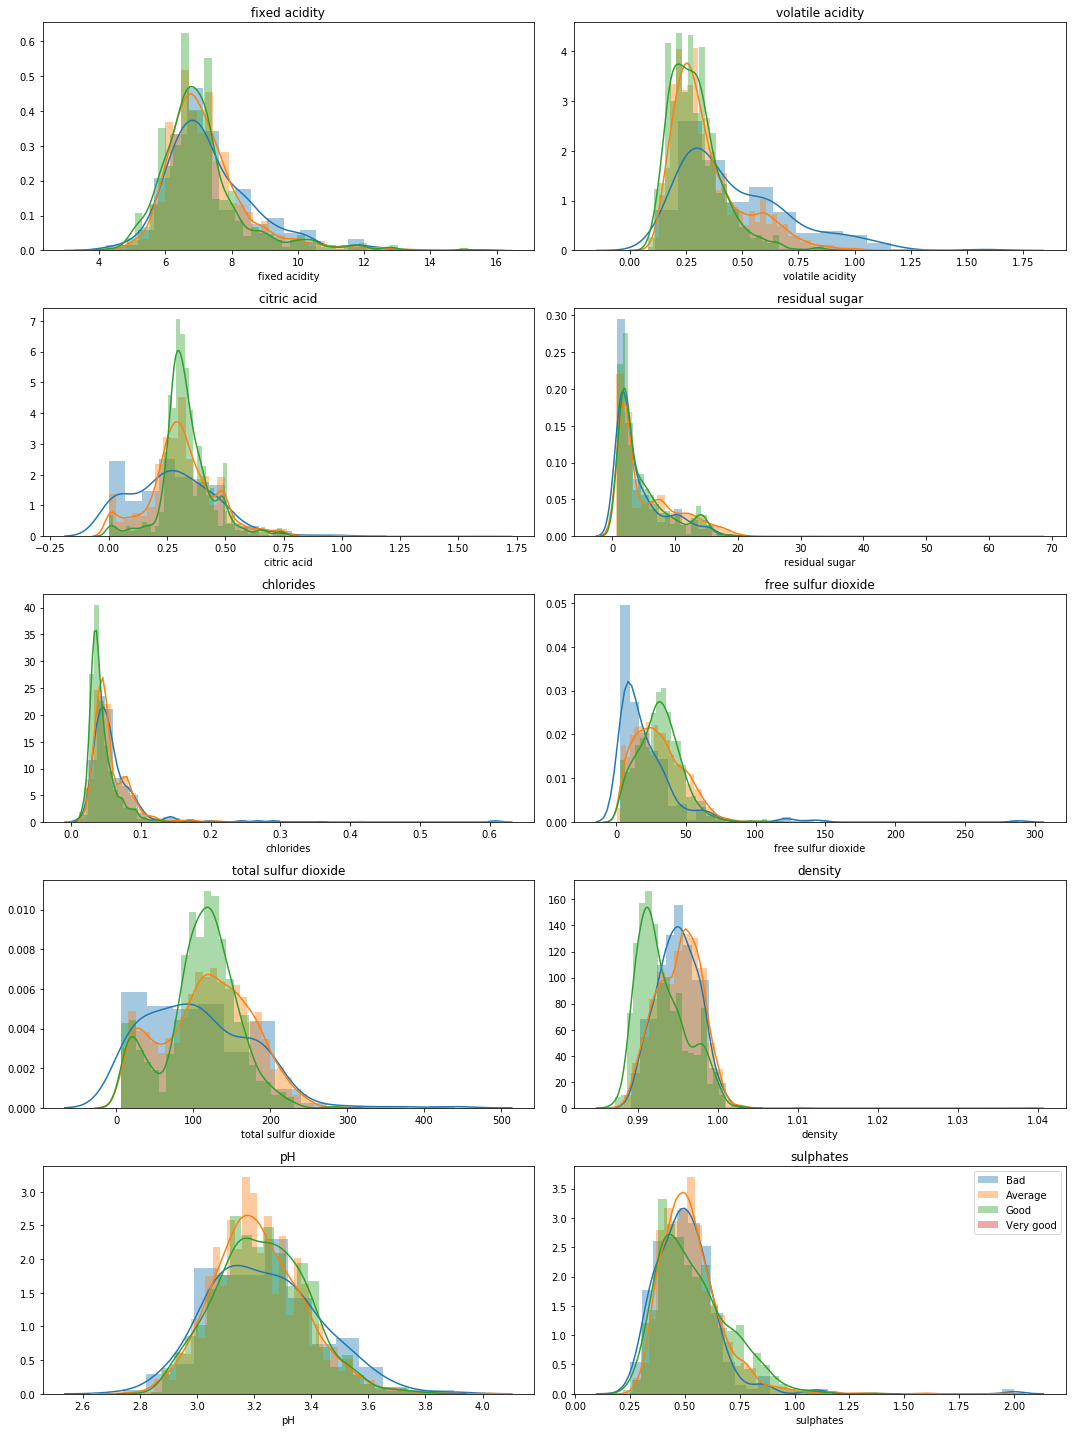

In [47]:
q_list = ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar',
       'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density',
       'pH', 'sulphates', 'alcohol']

fig, axes = plt.subplots(ncols=2, nrows=5, figsize=(15, 20))
axes = axes.ravel()

for var, q in zip(q_list, range(0,10)):
    for i in range(0,4):
        sns.distplot(data[var].loc[(data['cat'] == i)], ax=axes[q]).set_title(var)
        plt.legend(labels=['Bad','Average', 'Good', 'Very good'])
        fig.tight_layout()

In [10]:
from sklearn.ensemble import ExtraTreesClassifier

fm = ExtraTreesClassifier()
fm.fit(data.values[:, 0:10], data['quality'])
print(list(zip(data.columns, fm.feature_importances_)))

[('fixed acidity', 0.09013656520056162), ('volatile acidity', 0.11284295651132747), ('citric acid', 0.09260494341344437), ('residual sugar', 0.09993586801039507), ('chlorides', 0.09261381417015137), ('free sulfur dioxide', 0.09906707207668311), ('total sulfur dioxide', 0.09977369011117386), ('density', 0.12322481153585102), ('pH', 0.09061849968544272), ('sulphates', 0.09918177928496918)]


/Users/flatironschool/anaconda3/lib/python3.7/site-packages/sklearn/ensemble/forest.py:245: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)
